<a href="https://colab.research.google.com/github/Nikitha14-code/Datascience-project/blob/main/ACCIDENT_HOTSPOT_DETECTION_AND_RISK_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

# **Loading Datasets**

In [2]:
# From Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading Datasets
casuality = pd.read_csv('/content/drive/MyDrive/Accidents Data/dft-road-casualty-statistics-casualty-last-5-years.csv')
collision = pd.read_csv('/content/drive/MyDrive/Accidents Data/dft-road-casualty-statistics-collision-last-5-years.csv')
vehicle = pd.read_csv('/content/drive/MyDrive/Accidents Data/dft-road-casualty-statistics-vehicle-last-5-years.csv')

In [4]:
# First few columns of Datasets
casuality.head(), collision.head(), vehicle.head()

(  accident_index  accident_year accident_reference  vehicle_reference  \
 0  2019010128300           2019           10128300                  1   
 1  2019010128300           2019           10128300                  1   
 2  2019010128300           2019           10128300                  1   
 3  2019010152270           2019           10152270                  1   
 4  2019010155191           2019           10155191                  2   
 
    casualty_reference  casualty_class  sex_of_casualty  age_of_casualty  \
 0                   1               1                1               58   
 1                   2               2                2               -1   
 2                   3               2                2               -1   
 3                   1               1                2               24   
 4                   1               2                2               21   
 
    age_band_of_casualty  casualty_severity  ...  pedestrian_movement  \
 0                     

In [5]:
# Datasets Info
casuality.info(), collision.info(), vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665408 entries, 0 to 665407
Data columns (total 21 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      665408 non-null  object
 1   accident_year                       665408 non-null  int64 
 2   accident_reference                  665408 non-null  object
 3   vehicle_reference                   665408 non-null  int64 
 4   casualty_reference                  665408 non-null  int64 
 5   casualty_class                      665408 non-null  int64 
 6   sex_of_casualty                     665408 non-null  int64 
 7   age_of_casualty                     665408 non-null  int64 
 8   age_band_of_casualty                665408 non-null  int64 
 9   casualty_severity                   665408 non-null  int64 
 10  pedestrian_location                 665408 non-null  int64 
 11  pedestrian_movement                 665

(None, None, None)

In [6]:
# Description of Datasets
casuality.describe(), collision.describe(), vehicle.describe()

(       accident_year  vehicle_reference  casualty_reference  casualty_class  \
 count  665408.000000      665408.000000       665408.000000   665408.000000   
 mean     2020.969243           1.457074            1.359906        1.471729   
 std         1.447903           2.172231            2.862872        0.724579   
 min      2019.000000           1.000000            1.000000        1.000000   
 25%      2020.000000           1.000000            1.000000        1.000000   
 50%      2021.000000           1.000000            1.000000        1.000000   
 75%      2022.000000           2.000000            1.000000        2.000000   
 max      2023.000000         999.000000          999.000000        3.000000   
 
        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
 count    665408.000000    665408.000000         665408.000000   
 mean          1.366886        36.808116              6.310808   
 std           0.530522        19.525025              2.454075   
 min          

# **Handling Missing Values**

In [7]:
# Identify Columns with Missing Values
missing_values_summary = {
    'casuality': casuality.isnull().sum(),
    'collision': collision.isnull().sum(),
    'vehicle': vehicle.isnull().sum()
}
print(pd.DataFrame(missing_values_summary))

                                  casuality  collision  vehicle
accident_index                          0.0        0.0      0.0
accident_reference                      0.0        0.0      0.0
accident_severity                       NaN        0.0      NaN
accident_year                           0.0        0.0      0.0
age_band_of_casualty                    0.0        NaN      NaN
...                                     ...        ...      ...
vehicle_location_restricted_lane        NaN        NaN      0.0
vehicle_manoeuvre                       NaN        NaN      0.0
vehicle_reference                       0.0        NaN      0.0
vehicle_type                            NaN        NaN      0.0
weather_conditions                      NaN        0.0      NaN

[85 rows x 3 columns]


In [8]:
# Drop columns with a large amount of missing data
vehicle = vehicle.drop(columns=['dir_from_e', 'dir_from_n', 'dir_to_e', 'dir_to_n'])

In [9]:
# Impute the missing values with the mean or median
collision['location_easting_osgr'].fillna(collision['location_easting_osgr'].mean(), inplace=True)
collision['location_northing_osgr'].fillna(collision['location_northing_osgr'].mean(), inplace=True)
collision['longitude'].fillna(collision['longitude'].mean(), inplace=True)
collision['latitude'].fillna(collision['latitude'].mean(), inplace=True)

In [10]:
# Fill missing entries in time-sequenced data
collision['time'].fillna(method='ffill', inplace=True)

In [11]:
# Check remaining missing values
print(casuality.isnull().sum())
print(collision.isnull().sum())
print(vehicle.isnull().sum())

accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
enhanced_casualty_severity            0
casualty_distance_banding             0
dtype: int64
accident_index                                 0
accident_year                                  0
accident_reference                             0


# **Merging Datasets For Analysis**

In [12]:
# Merging three datasets for analysis
merged = pd.merge(casuality, collision, on='accident_index', how='inner')
merged1 = pd.merge(merged, vehicle, on='accident_index', how='inner')

In [13]:
merged1.head()

,accident_index,accident_year_x,accident_reference_x,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,...,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver,escooter_flag,driver_distance_banding
0,2019010128300,2019,10128300,1,1,1,1,58,9,3,...,9,-1,-1,-1,-1,2,1,E01003175,0,2
1,2019010128300,2019,10128300,1,1,1,1,58,9,3,...,-1,-1,-1,-1,-1,2,1,E01003175,0,2
2,2019010128300,2019,10128300,1,2,2,2,-1,-1,3,...,9,-1,-1,-1,-1,2,1,E01003175,0,2
3,2019010128300,2019,10128300,1,2,2,2,-1,-1,3,...,-1,-1,-1,-1,-1,2,1,E01003175,0,2
4,2019010128300,2019,10128300,1,3,2,2,-1,-1,3,...,9,-1,-1,-1,-1,2,1,E01003175,0,2


In [14]:
merged1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764735 entries, 0 to 764734
Data columns (total 86 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               764735 non-null  object 
 1   accident_year_x                              764735 non-null  int64  
 2   accident_reference_x                         764735 non-null  object 
 3   vehicle_reference_x                          764735 non-null  int64  
 4   casualty_reference                           764735 non-null  int64  
 5   casualty_class                               764735 non-null  int64  
 6   sex_of_casualty                              764735 non-null  int64  
 7   age_of_casualty                              764735 non-null  int64  
 8   age_band_of_casualty                         764735 non-null  int64  
 9   casualty_severity                            764735 non-nul

In [15]:
merged1.describe()

,accident_year_x,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,escooter_flag,driver_distance_banding
count,764735.000000,764735.000000,764735.000000,764735.000000,764735.000000,764735.000000,764735.000000,764735.000000,764735.000000,764735.000000,...,764735.000000,764735.000000,764735.000000,764735.000000,764735.000000,764735.000000,764735.000000,764735.000000,764735.000000,764735.000000
mean,2020.505047,1.578334,1.433608,1.368295,1.375645,37.211424,6.378620,2.807291,0.436071,0.353448,...,1.468908,35.763633,5.975643,1441.249743,1.122803,6.264108,3.869952,0.916827,0.002920,1.475103
std,1.319428,1.802706,2.632995,0.623458,0.516677,19.166157,2.390777,0.424670,1.676458,1.525923,...,0.668802,20.705801,3.091539,1596.719883,1.632096,6.291382,3.436506,1.101871,0.053958,1.642887
min,2019.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,2019.000000,1.000000,1.000000,1.000000,1.000000,23.000000,5.000000,3.000000,0.000000,0.000000,...,1.000000,23.000000,5.000000,125.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,2020.000000,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,...,1.000000,35.000000,6.000000,1398.000000,1.000000,5.000000,4.000000,1.000000,0.000000,1.000000
75%,2022.000000,2.000000,2.000000,2.000000,2.000000,51.000000,8.000000,3.000000,0.000000,0.000000,...,2.000000,50.000000,8.000000,1968.000000,2.000000,11.000000,7.000000,1.000000,0.000000,3.000000
max,2023.000000,999.000000,999.000000,3.000000,9.000000,102.000000,11.000000,3.000000,10.000000,9.000000,...,3.000000,101.000000,11.000000,29980.000000,12.000000,122.000000,10.000000,3.000000,1.000000,5.000000


In [16]:
# Renaming column names
merged1.rename(columns={
    'accident_year_x': 'accident_year_casualty',
    'accident_year_y': 'accident_year_collision',
    'vehicle_reference_x': 'vehicle_reference_casualty',
    'vehicle_reference_y': 'vehicle_reference_vehicle'
}, inplace=True)

In [17]:
# Optimize data types
int_columns = merged1.select_dtypes('int64').columns
merged1[int_columns] = merged1[int_columns].astype('int32')

float_columns = merged1.select_dtypes('float64').columns
merged1[float_columns] = merged1[float_columns].astype('float32')

In [18]:
# Save merged dataset as a backup
merged1.to_csv('merged_accident_data.csv', index=False, compression='zip')

# **Data Pre-processing**

In [19]:
# Convert date column to datetime format
merged1['date'] = pd.to_datetime(merged1['date'])

# Extract day of the week, month, and year
merged1['day_of_week'] = merged1['date'].dt.dayofweek
merged1['month'] = merged1['date'].dt.month
merged1['year'] = merged1['date'].dt.year

# Extract hour of the day from time column if in HH:MM format
merged1['time'] = pd.to_datetime(merged1['time'], format='%H:%M', errors='coerce')
merged1['hour'] = merged1['time'].dt.hour

In [20]:
# Creating an urban/rural indicator using the 'urban_or_rural_area' column
merged1['is_urban'] = merged1['urban_or_rural_area'].apply(lambda x: 1 if x == 1 else 0)

# Use clustering algorithms like KMeans to categorize locations into hotspot regions.
from sklearn.cluster import KMeans

# Set number of clusters
kmeans = KMeans(n_clusters=10, random_state=0)
merged1['location_cluster'] = kmeans.fit_predict(merged1[['longitude', 'latitude']].dropna())

In [21]:
# Assigning weights to severity columns to create a composite severity score
merged1['severity_score'] = (
    merged1['casualty_severity'] * 0.6 +
    merged1['accident_severity'] * 0.4
)

In [22]:
# Simplifying weather conditions
weather_mapping = {
    1: 'Fine', 2: 'Raining', 3: 'Snowing', 4: 'Fog', 5: 'Other'
}
merged1['weather_condition_desc'] = merged1['weather_conditions'].map(weather_mapping)

# Grouping light conditions into 'Daylight' and 'Non-Daylight'
merged1['light_daytime'] = merged1['light_conditions'].apply(lambda x: 'Daylight' if x in [1, 2] else 'Non-Daylight')

# **Exploratory Data Analysis(EDA)**

## **1. Accident Severity Distribution**

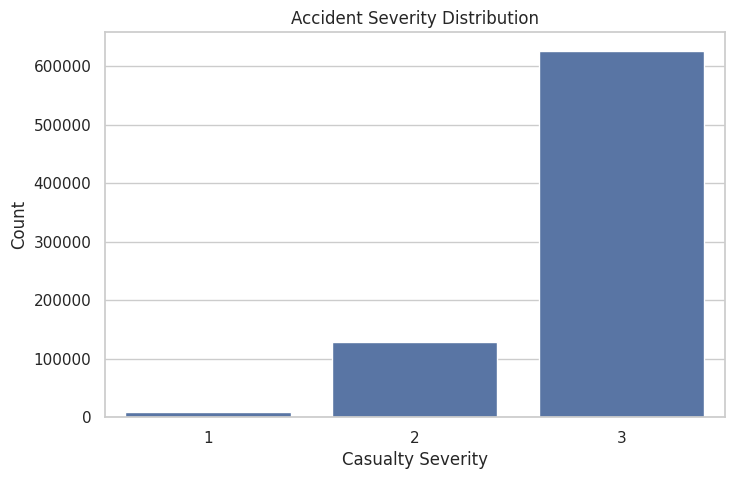

In [37]:
# Set global style for seaborn
sns.set(style="whitegrid")

# 1. Accident Severity Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=merged1, x='casualty_severity')
plt.title("Accident Severity Distribution")
plt.xlabel("Casualty Severity")
plt.ylabel("Count")
plt.show()

## **2. Casualty Severity by Age Group**

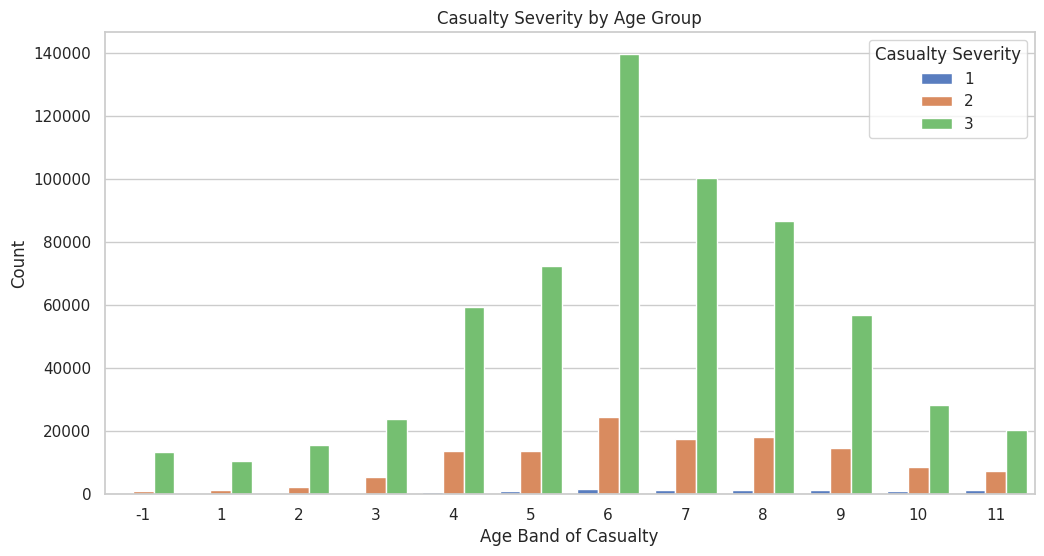

In [38]:
# 2. Casualty Severity by Age Group
plt.figure(figsize=(12, 6))
sns.countplot(data=merged1, x='age_band_of_casualty', hue='casualty_severity', palette="muted")
plt.title("Casualty Severity by Age Group")
plt.xlabel("Age Band of Casualty")
plt.ylabel("Count")
plt.legend(title="Casualty Severity")
plt.show()

## **3. Accidents by Time of Day (Peak and Off-Peak Hours)**

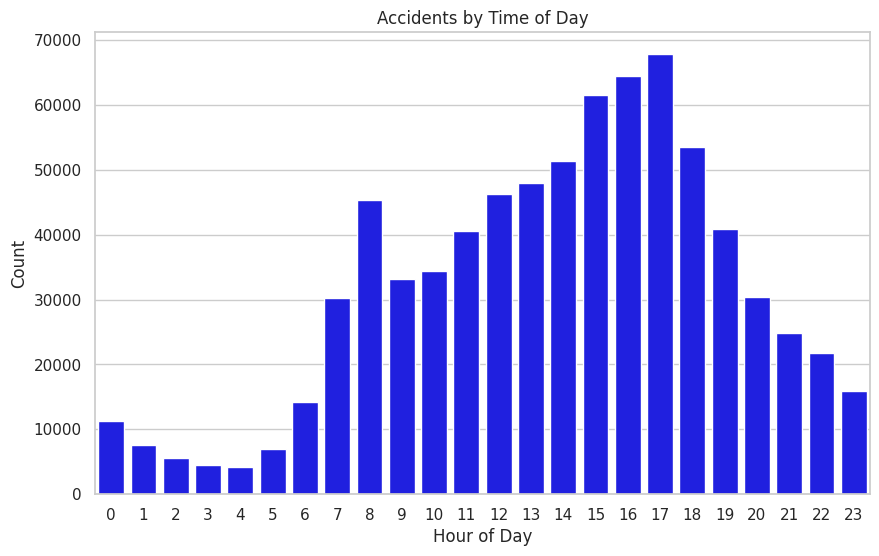

In [39]:
# 3. Accidents by Time of Day (Peak and Off-Peak Hours)
plt.figure(figsize=(10, 6))
sns.countplot(data=merged1, x='hour', color="blue")
plt.title("Accidents by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

## **4. Accidents by Day of the Week**

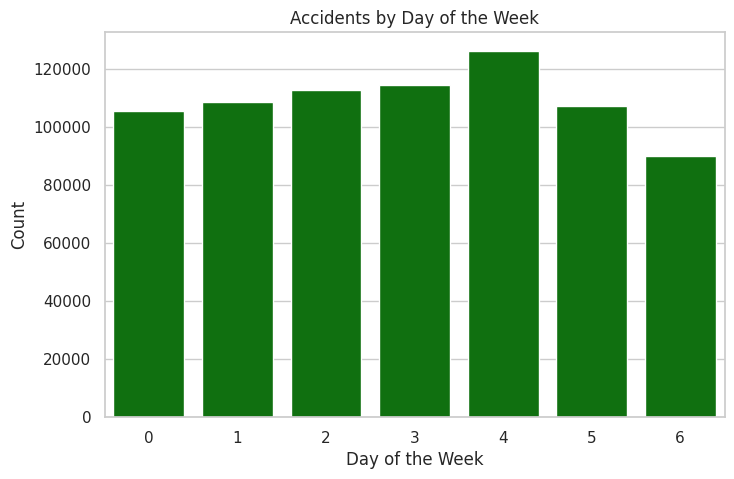

In [40]:
# 4. Accidents by Day of the Week
plt.figure(figsize=(8, 5))
sns.countplot(data=merged1, x='day_of_week', color="green")
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

## **5. Monthly Distribution of Accidents**

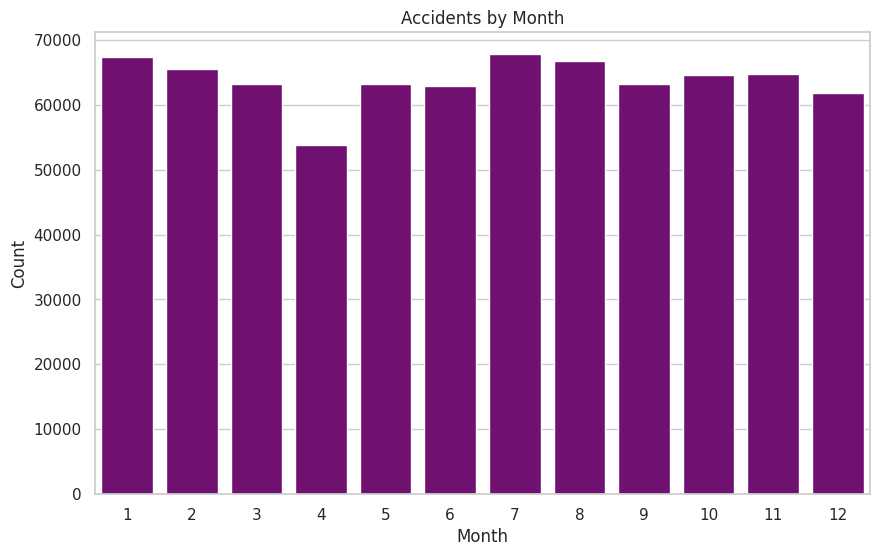

In [41]:
# 5. Monthly Distribution of Accidents
plt.figure(figsize=(10, 6))
sns.countplot(data=merged1, x='month', color="purple")
plt.title("Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

## **6. Accident Severity by Weather Conditions**

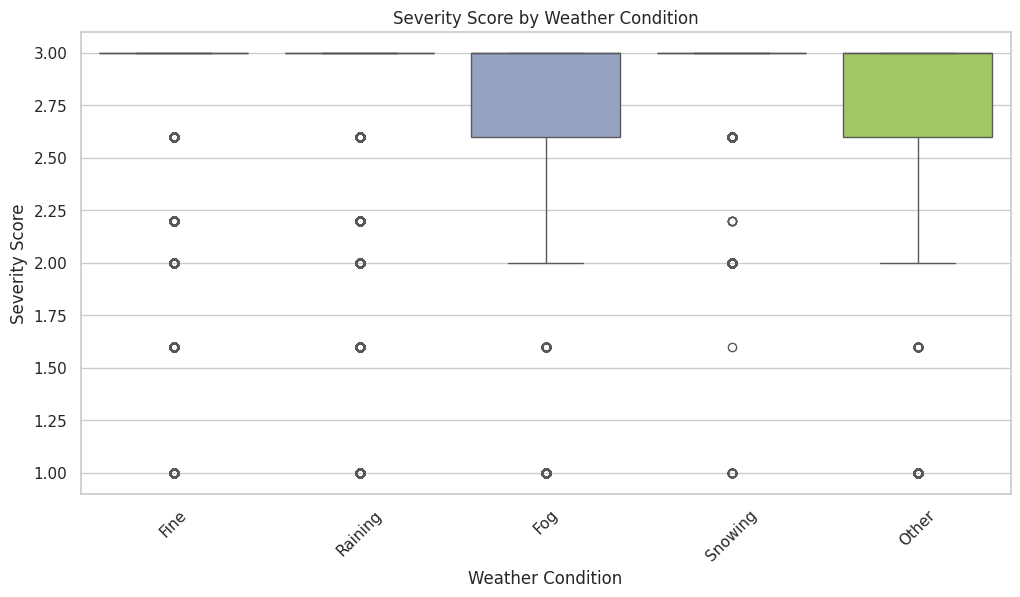

In [42]:
# 6. Accident Severity by Weather Conditions
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged1, x='weather_condition_desc', y='severity_score', palette="Set2")
plt.title("Severity Score by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Severity Score")
plt.xticks(rotation=45)
plt.show()

## **7. Accident Hotspots by Geospatial Clusters**

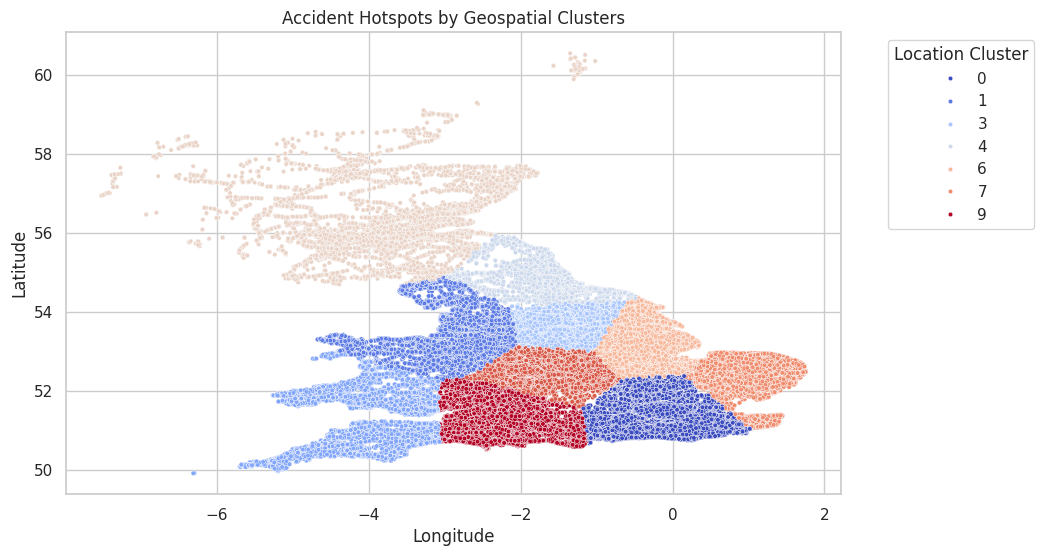

In [43]:
# 7. Accident Hotspots by Geospatial Clusters (Scatter)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged1, x='longitude', y='latitude', hue='location_cluster', palette="coolwarm", s=10)
plt.title("Accident Hotspots by Geospatial Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Location Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **8. Severity Score Distribution**

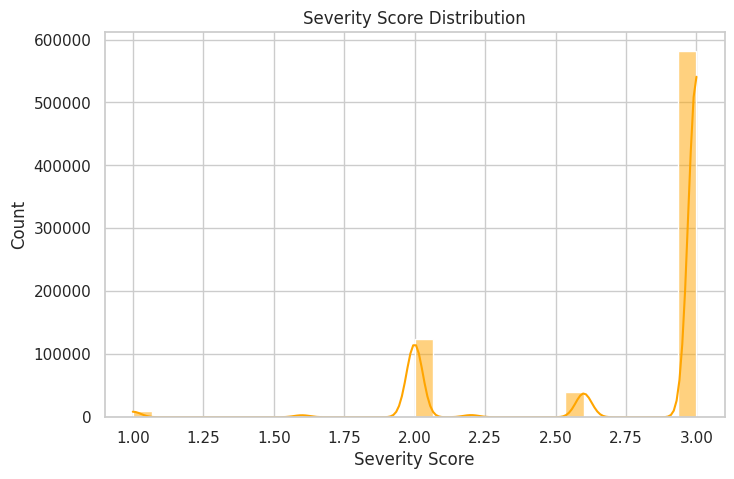

In [44]:
# 8. Severity Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=merged1, x='severity_score', bins=30, kde=True, color="orange")
plt.title("Severity Score Distribution")
plt.xlabel("Severity Score")
plt.ylabel("Count")
plt.show()

## **9. Accidents by Road Surface Conditions**

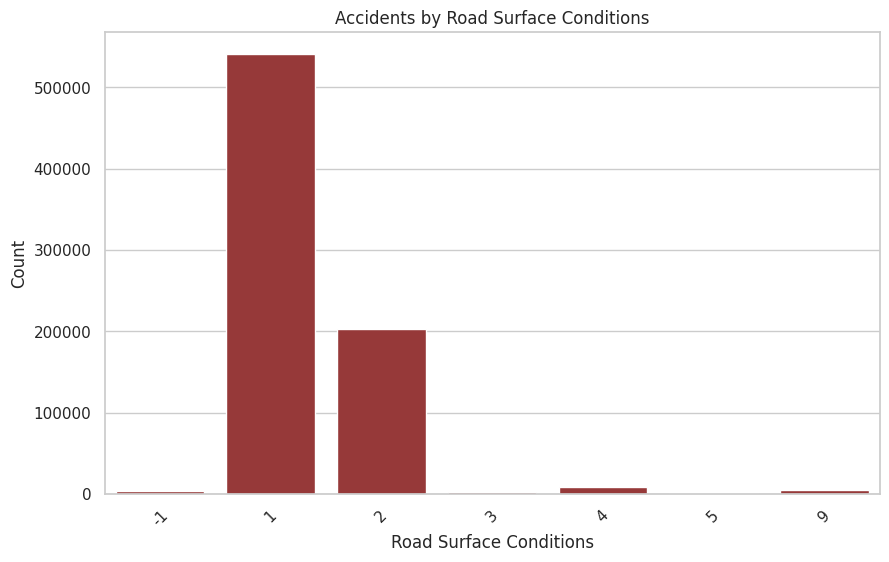

In [46]:
# 9. Accidents by Road Surface Conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=merged1, x='road_surface_conditions', color="brown")
plt.title("Accidents by Road Surface Conditions")
plt.xlabel("Road Surface Conditions")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## **10. Accidents by Light Conditions**

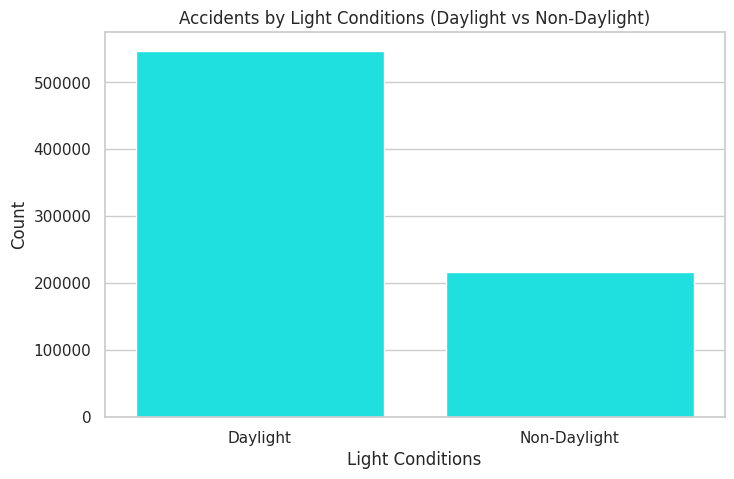

In [47]:
# 10. Accidents by Light Conditions
plt.figure(figsize=(8, 5))
sns.countplot(data=merged1, x='light_daytime', color="cyan")
plt.title("Accidents by Light Conditions (Daylight vs Non-Daylight)")
plt.xlabel("Light Conditions")
plt.ylabel("Count")
plt.show()

## **11. Pair Plot for Severity Factors**

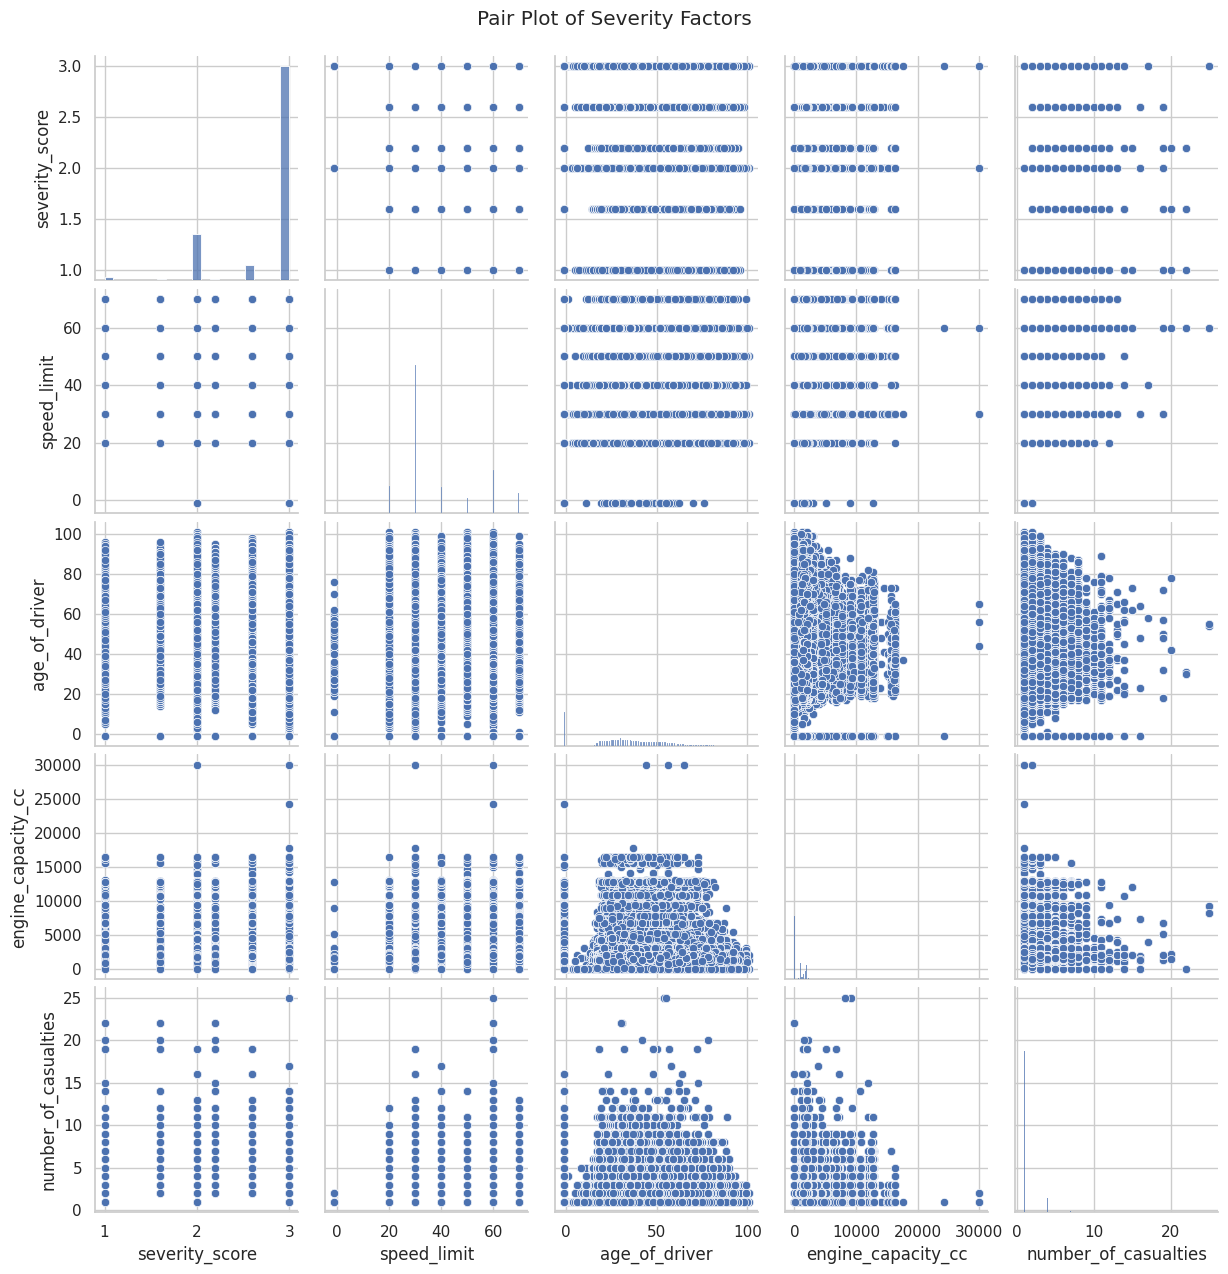

In [48]:
# 11. Pair Plot for Severity Factors
selected_columns = ['severity_score', 'speed_limit', 'age_of_driver', 'engine_capacity_cc', 'number_of_casualties']
sns.pairplot(merged1[selected_columns])
plt.suptitle("Pair Plot of Severity Factors", y=1.02)
plt.show()

# **Classification Models**

In [49]:
def categorize_risk(score):
    if score > 70:  # Adjust thresholds as needed
        return "High"
    elif score > 40:
        return "Medium"
    else:
        return "Low"

merged1['risk_level'] = merged1['severity_score'].apply(categorize_risk)

In [51]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
merged1['risk_level_encoded'] = encoder.fit_transform(merged1['risk_level'])

In [52]:
features = ['speed_limit', 'age_of_driver', 'weather_conditions', 'light_conditions', 'road_surface_conditions']
X = merged1[features]
y = merged1['risk_level_encoded']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229421

    accuracy                           1.00    229421
   macro avg       1.00      1.00      1.00    229421
weighted avg       1.00      1.00      1.00    229421



In [60]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229421

    accuracy                           1.00    229421
   macro avg       1.00      1.00      1.00    229421
weighted avg       1.00      1.00      1.00    229421

